# Regression model to predict the housing prices Data set

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

In [2]:
HPdf = pd.read_csv('HousingPrices.csv.txt')
#reading the data from csv file
#data frame is taken as 'HPdf'

In [3]:
HPdf.head()
#head() will show the first five rows with data from csv file.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
HPdf.shape

(21613, 21)

In [5]:
HPdf_train = HPdf.copy()
HPdf_train.drop('id', axis=1, inplace=True)
HPdf.head()
#here 'id' is dropped as it has no impact in comparisons and 'date' also dropped in later steps.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
HPdf_train.info()
#To find the data type of respected columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
HPdf_train.shape

(21613, 20)

In [8]:
HPdf_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# Checking Null values
HPdf_train.isnull().sum()*100/HPdf_train.shape[0]
# There are no NULL values in the dataset, hence it is clean.

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

# Exploratory data analysis

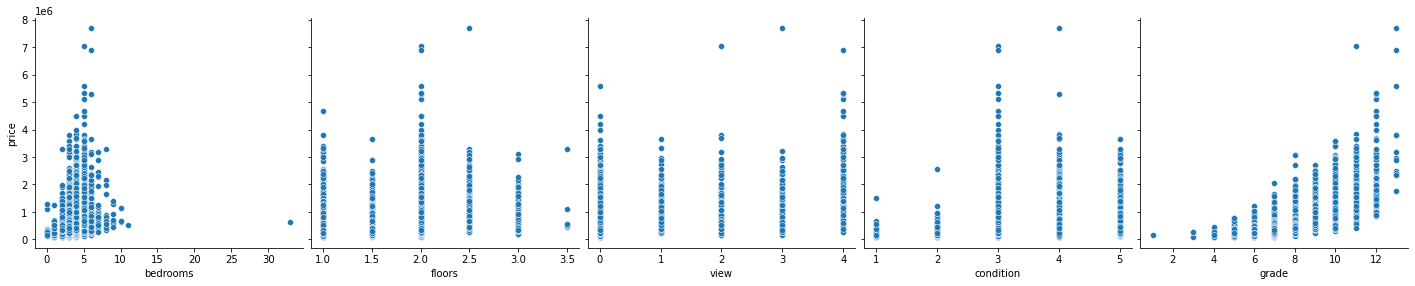

In [10]:
sns.pairplot(HPdf, x_vars =['bedrooms', 'floors','view','condition','grade'], 
             y_vars ='price',height=4, kind='scatter')
#it is used to show the relations between the two factors.

C:\Users\Sidhvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


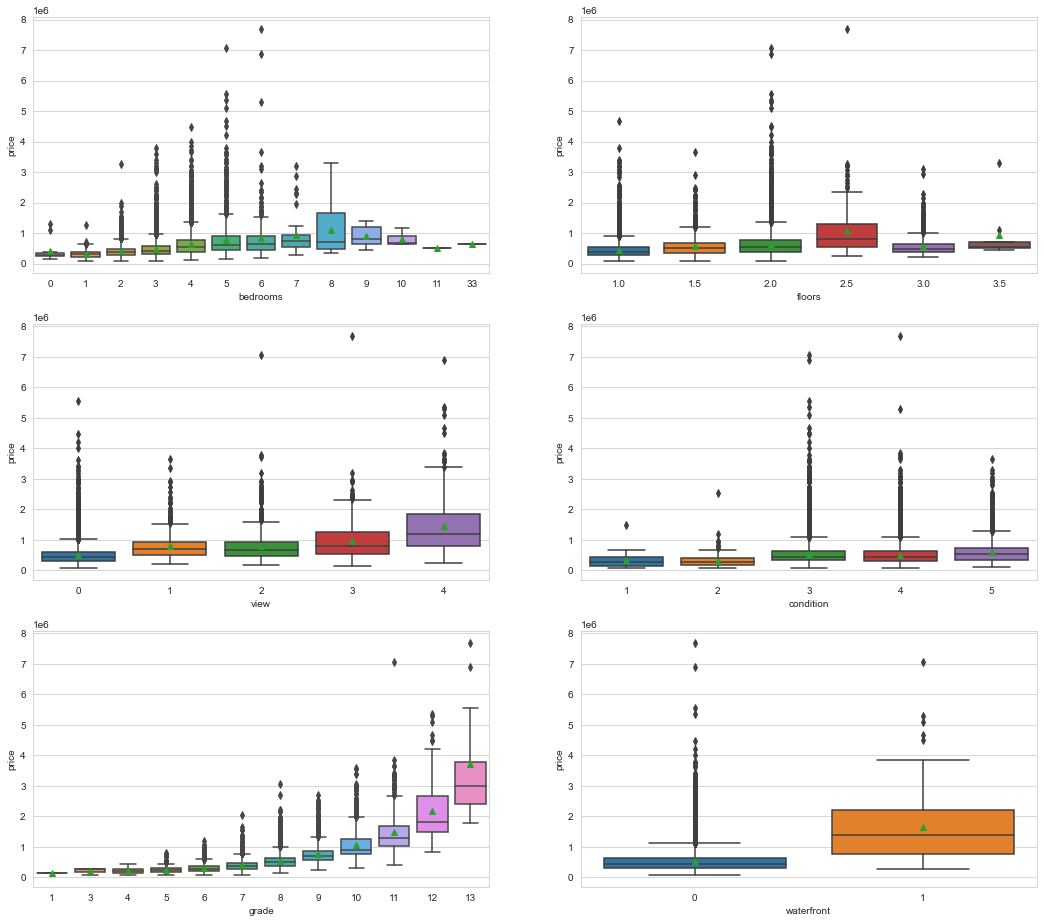

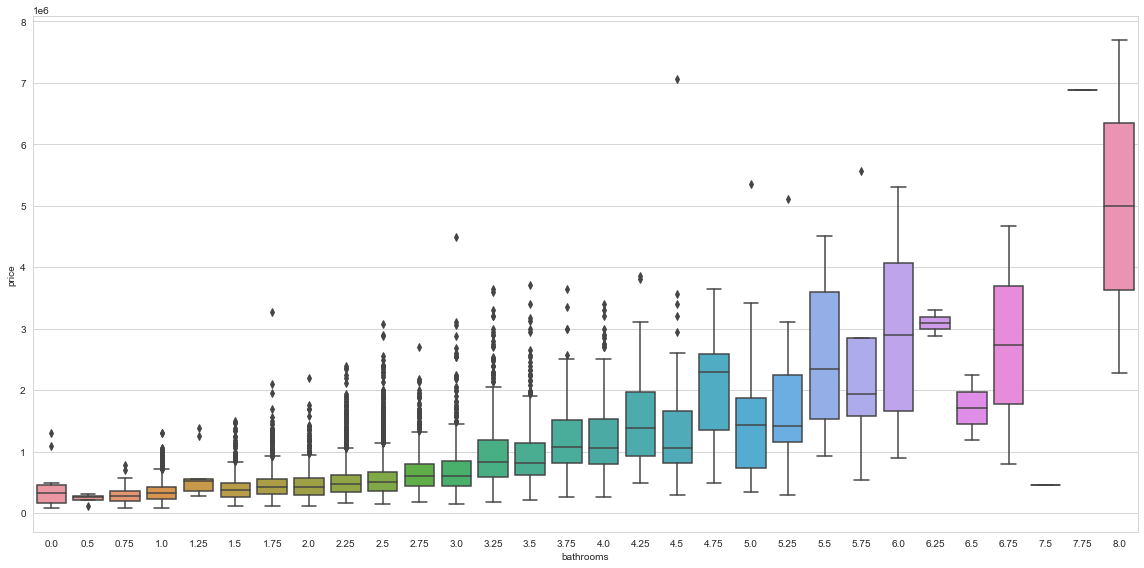

In [11]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 2, figsize=(18,16))
sns.boxplot(x = 'bedrooms', y = 'price', data = HPdf_train, orient = 'v', showmeans = True, ax = ax[0][0])
sns.boxplot(x = 'floors', y = 'price', data = HPdf_train, orient = 'v', showmeans = True, ax = ax[0][1])
sns.boxplot(x = 'view', y = 'price', data = HPdf_train, orient = 'v', showmeans = True, ax = ax[1][0])
sns.boxplot(x = 'condition', y = 'price', data = HPdf_train, orient = 'v', showmeans = True, ax = ax[1][1])
sns.boxplot(x = 'grade', y = 'price', data = HPdf_train, orient = 'v', showmeans = True, ax = ax[2][0])
sns.boxplot(x= 'waterfront', y= 'price', data= HPdf_train, orient='v', showmeans = True, ax=ax[2][1])

fig = plt.figure(figsize=(16, 8))
sns.boxplot('bathrooms', 'price', data=HPdf_train)
plt.tight_layout()
plt.tight_layout()
plt.show()
#here boxplot is used to show the data size occupied and to represent more clearly.

C:\Users\Sidhvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sidhvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sidhvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sidhvi\ana

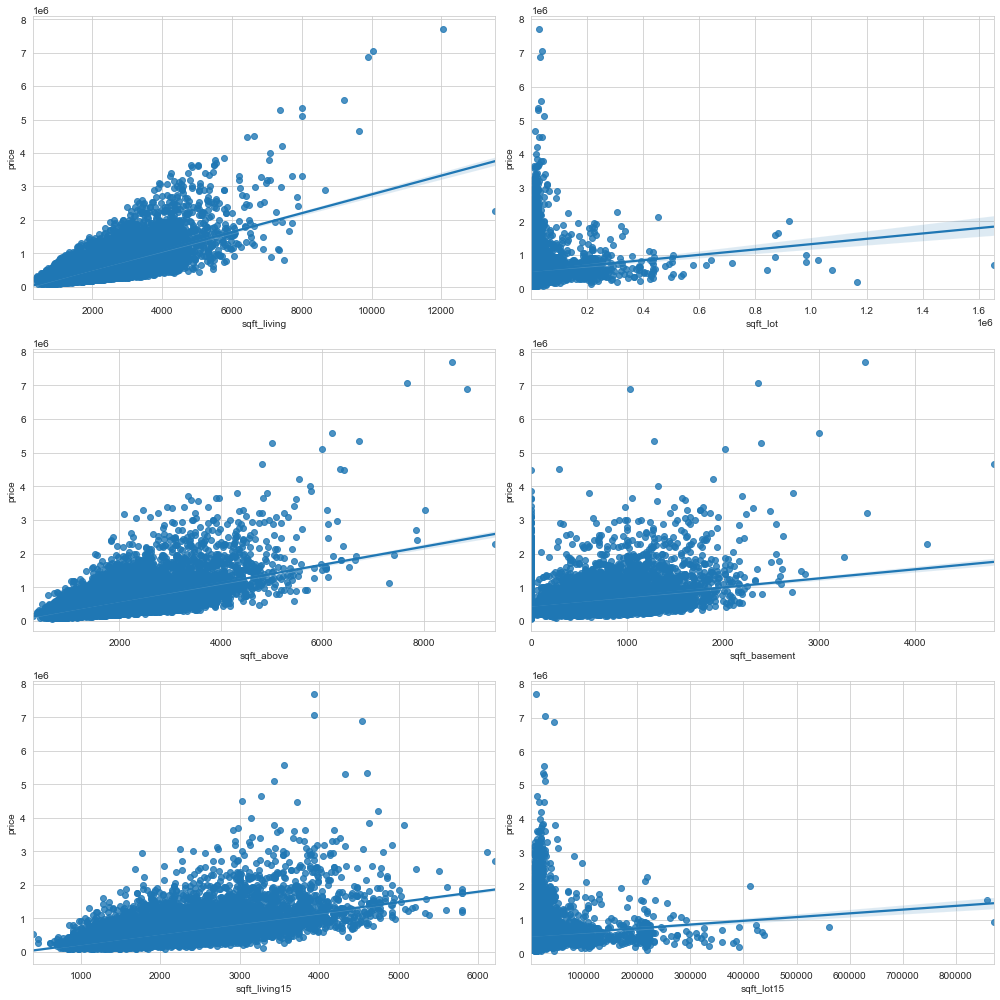

In [12]:
features_cont = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 
                'sqft_living15', 'sqft_lot15']

fig, axes = plt.subplots(3,2, figsize=(14,14))

for xcol, ax in zip(features_cont, axes.flatten()):
    sns.regplot(xcol, 'price', data=HPdf_train, ax=ax)

plt.tight_layout()
#taken most effected columns with price and plotted scatter plot.

<AxesSubplot:xlabel='lat', ylabel='long'>

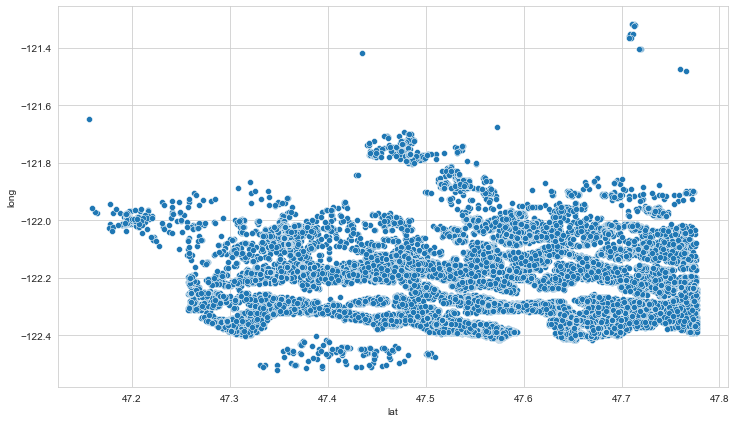

In [13]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(data=HPdf, x="lat", y="long")
#plotting to find where houses are located using latittude and longitude.

<AxesSubplot:>

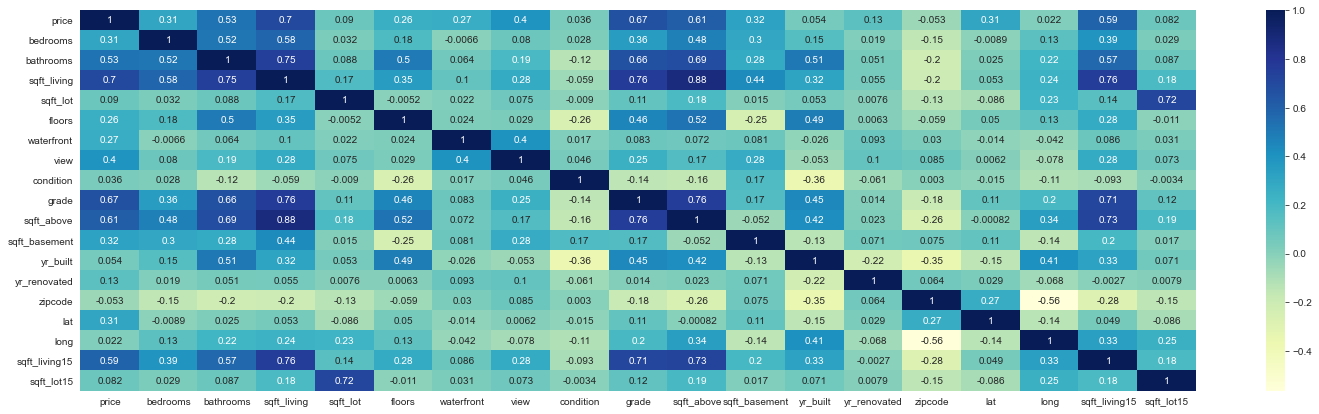

In [14]:
correlation = HPdf_train.corr()
correlation1 = correlation.abs().unstack()
correlation1.sort_values(ascending=False)
plt.subplots(figsize=(25,7))
sns.heatmap(correlation,annot=True,cmap="YlGnBu")
#heatmap shows the corelation between each factor and indicated according to the scale shown at bottom right.

# Creating the train, test Split

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#importing some required functions to split and train data and to implement linear regression.

In [16]:
#test data is taken as 30% and training data as 70%.
X = HPdf.drop(['price','date'], axis=1)
Y = HPdf['price'] 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=230)
#as mentioned above date is dropped as it has no effect.

# Implementing linear regression model

In [17]:
#fitting the data
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

In [18]:
#using recursive feature elimination.
from sklearn.feature_selection import RFE
rfe = RFE(lm, 6)
rfe = rfe.fit(X_train, Y_train)
#here i'm taking 6 feature from feature selection.

C:\Users\Sidhvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [19]:
col = X_train.columns[rfe.support_]
col
#output shows the columns used

Index(['waterfront', 'view', 'condition', 'grade', 'lat', 'long'], dtype='object')

In [20]:
X_train_rfe = X_train[col]

In [22]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [23]:
import statsmodels.api as sm
lm = sm.OLS(Y_train,X_train_rfe).fit()
print(lm.summary())
#shows the results of OLS regression.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3863.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:38:47   Log-Likelihood:            -2.0791e+05
No. Observations:               15129   AIC:                         4.158e+05
Df Residuals:                   15122   BIC:                         4.159e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.11e+07   1.68e+06    -24.461      0.0

In [24]:
# trained vs predicted.
Y_train_price = lm.predict(X_train_rfe)
res = (Y_train_price - Y_train)

# Residual analysis

C:\Users\Sidhvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

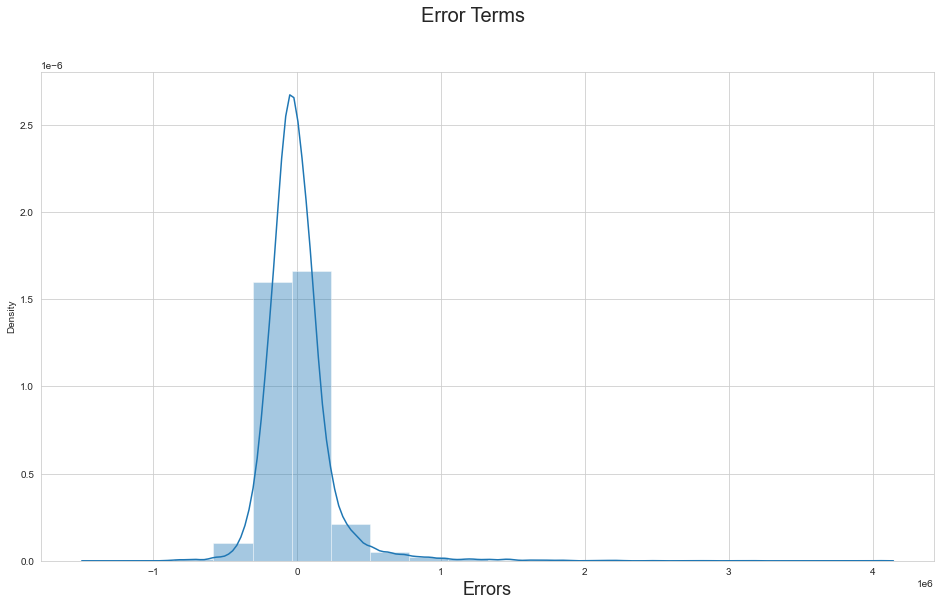

In [25]:
#plotting the error terms.
fig = plt.figure(figsize = (16,9))
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

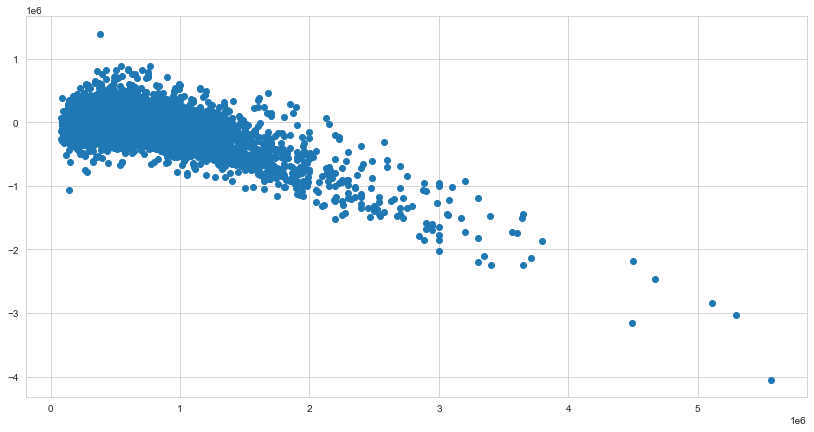

In [26]:
fig = plt.figure(figsize = (14,7))
plt.scatter(Y_train,res)
plt.show()

In [27]:
Y_test = HPdf.pop('price')
X_test = HPdf

In [28]:
X_test = sm.add_constant(X_test)

In [29]:
X_test_rfe = X_test[X_train_rfe.columns]

In [30]:
Y_pred = lm.predict(X_test_rfe)

In [31]:
#to find the r2 score from predicted vs tested.
from sklearn.metrics import r2_score 
r2_score(Y_test, Y_pred)

0.5896702100120661

Text(0, 0.5, 'y_pred')

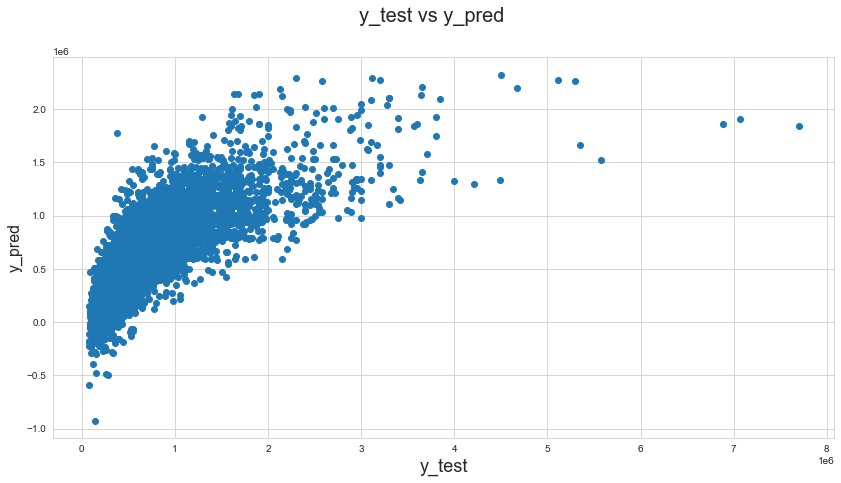

In [32]:
# plotting the data from tested and predicted data.
fig = plt.figure(figsize = (14,7))
plt.scatter(Y_test,Y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# Conclusion